In [ ]:
pip install -r requirements.txt

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Checking for Rust toolchain....
      
      Cargo, the Rust package manager, is not installed or is not on PATH.
      This package requires Rust and Cargo to compile extensions. Install it through
      the system's package manager or via https://rustup.rs/
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.



  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached notebook-7.3.3-py3-none-any.whl.metadata (10 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached jupyterlab-4.3.6-py3-none-any.whl.metadata (16 kB)
  Using cached jupyter_server-2.14.2-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached jupyter_events-0.1

In [11]:
pip install scikit-learn

  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as  plt 

In [14]:
IMG_SIZE = 48
NUM_CLASSES = 7

In [15]:
def load_fer_data(csv_file):
    data = pd.read_csv(csv_file)
    # Get pixel values and labels
    pixels = data['pixels'].tolist()
    emotions = data['emotion'].values

    # Convert pixels from string to integers and reshape to 48x48
    X = []
    for pixel_sequence in pixels:
        pixel_array = np.array([int(pixel) for pixel in pixel_sequence.split()])
        X.append(pixel_array.reshape(48, 48, 1))  # Reshape each image to 48x48x1 (grayscale)

    X = np.array(X).astype('float32')
    y = to_categorical(emotions, num_classes=7)  # One-hot encode labelS
    
    return X, y



In [16]:
X, y = load_fer_data('fer2013.csv')
X /= 255.0  # Normalize pixel values to [0, 1]

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
def create_cnn_model():# create the CNN model
    model = Sequential() # Create a Sequential model
    
    # 1st Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu' , input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2))) 


    # 2nd Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3rd Convolutional Layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the layers
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(7, activation='softmax'))  # 7 emotion classes

    return model


In [19]:
model = create_cnn_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

# Save the trained model
model.save('emotion_detector_model.h5')


Epoch 1/30
449/449 [==============================] - 190s 415ms/step - loss: 1.7510 - accuracy: 0.2877 - val_loss: 1.5836 - val_accuracy: 0.3656
Epoch 2/30
449/449 [==============================] - 142s 315ms/step - loss: 1.5169 - accuracy: 0.4133 - val_loss: 1.4238 - val_accuracy: 0.4533
Epoch 3/30
449/449 [==============================] - 135s 301ms/step - loss: 1.3908 - accuracy: 0.4676 - val_loss: 1.3208 - val_accuracy: 0.4946
Epoch 4/30
449/449 [==============================] - 135s 300ms/step - loss: 1.3142 - accuracy: 0.4981 - val_loss: 1.2611 - val_accuracy: 0.5196
Epoch 5/30
449/449 [==============================] - 134s 297ms/step - loss: 1.2567 - accuracy: 0.5203 - val_loss: 1.2227 - val_accuracy: 0.5300
Epoch 6/30
449/449 [==============================] - 142s 317ms/step - loss: 1.2045 - accuracy: 0.5427 - val_loss: 1.2051 - val_accuracy: 0.5467
Epoch 7/30
449/449 [==============================] - 148s 330ms/step - loss: 1.1659 - accuracy: 0.5597 - val_loss: 1.2038 -

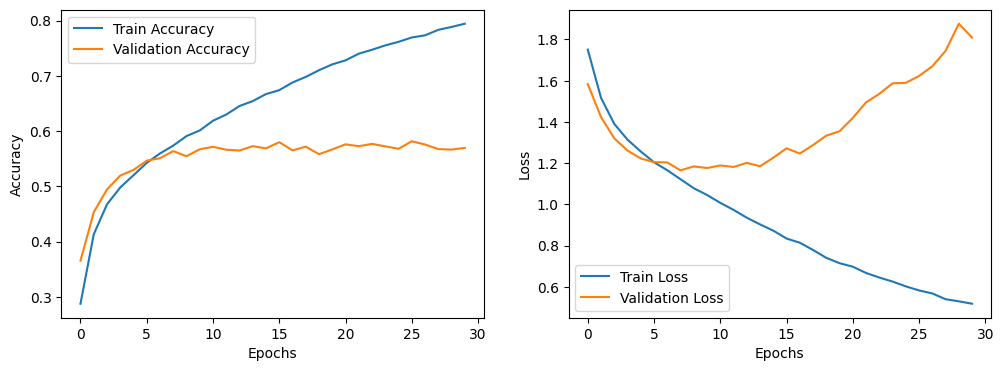

In [20]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)



In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

113/113 [==============================] - 7s 58ms/step - loss: 1.7168 - accuracy: 0.5734
Test Accuracy: 57.34%
